#######################################################################################################################
Data Preprocessing
---------------------
########################################################################################################################

Importing all the required libraries

In [42]:
import numpy as np
import pandas as pd # type: ignore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Importing the data from a CSV file to a pandas DataFrame

In [18]:
Cars = pd.read_csv('Cars93.csv')

Set pandas to display all columns and 
Head(2) will show all the column with 2 tuples 

In [36]:
pd.set_option('display.max_columns', None)
Cars.head(10)
print(Cars.shape)

(93, 26)


find number of values particular attributes have

In [20]:

# print("\nModel Frequency:\n", Cars['Model'].value_counts())
print("\nType Frequency:\n", Cars['Type'].value_counts())
# print("\nMax.Price Frequency:\n", Cars['Max.Price'].value_counts())
print("\nAirBags Frequency:\n", Cars['AirBags'].value_counts())




Type Frequency:
 Type
Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: count, dtype: int64

AirBags Frequency:
 AirBags
Driver only           43
Driver & Passenger    16
Name: count, dtype: int64


In [21]:
Cars.describe() #summary of data

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


In [22]:
Cars.isnull().sum() #finding attributes having number of null values

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags               34
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
dtype: int64

Number of rows and column

In [23]:
Cars.shape # Dimension

(93, 26)

In [24]:
print(Cars.dtypes) #dtypes

Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
dtype: object


Task 1.Assign a type to each of the following features (a) Model, (b) Type, (c) Max. Price and
(d) Airbags from the following: ordinal/nominal/ratio/interval scale.

In [25]:
# Convert Model and Type to category
Cars['Model'] = Cars['Model'].astype('category')
Cars['Type'] = Cars['Type'].astype('category')

# Convert Max. Price to float
Cars['Max.Price'] = Cars['Max.Price'].astype(float)

# Convert AirBags to ordered category
airbag_categories = ["None", "Driver only", "Driver & Passenger"]
Cars['AirBags'] = pd.Categorical(Cars['AirBags'], categories=airbag_categories, ordered=True)

print(Cars.dtypes)


Manufacturer            object
Model                 category
Type                  category
Min.Price              float64
Price                  float64
Max.Price              float64
MPG.city                 int64
MPG.highway              int64
AirBags               category
DriveTrain              object
Cylinders               object
EngineSize             float64
Horsepower               int64
RPM                      int64
Rev.per.mile             int64
Man.trans.avail         object
Fuel.tank.capacity     float64
Passengers               int64
Length                   int64
Wheelbase                int64
Width                    int64
Turn.circle              int64
Rear.seat.room         float64
Luggage.room           float64
Weight                   int64
Origin                  object
dtype: object


Task 2. Write a function to handle the missing values in the dataset (e.g., any NA, NaN values)

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags               34
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
dtype: int64


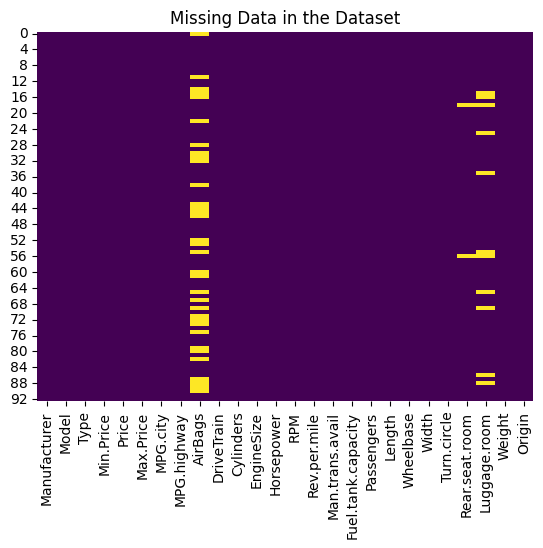

In [26]:
print(Cars.isnull().sum())
sns.heatmap(Cars.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data in the Dataset")
plt.show()

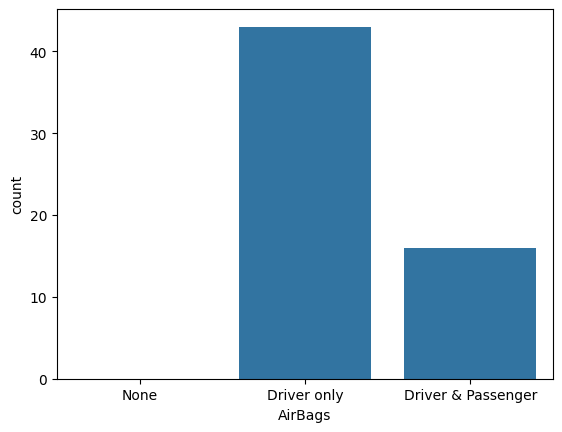

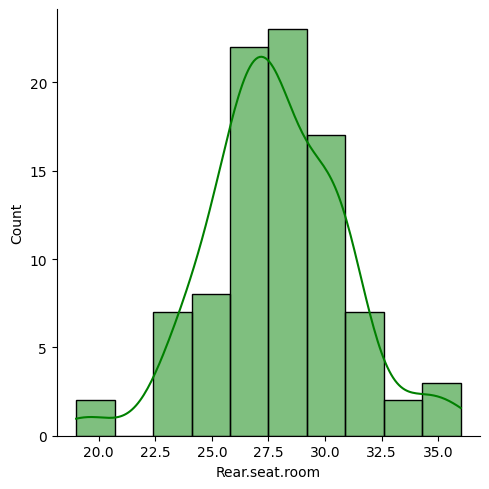

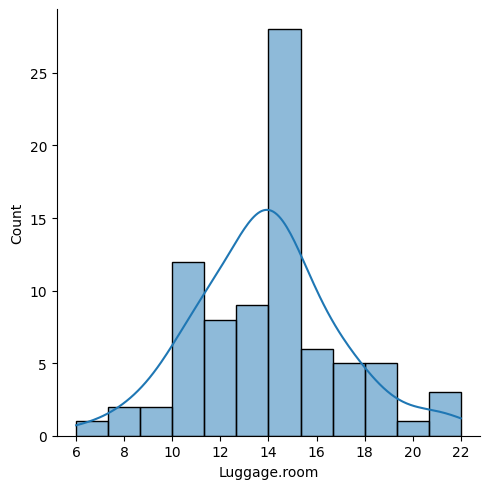

In [27]:
sns.countplot(x='AirBags', data=Cars, order=airbag_categories)
sns.displot(Cars['Rear.seat.room'], kde=True, bins=10, color="green")
sns.displot(Cars['Luggage.room'], kde=True)

In [28]:
def handleMissingVal(df, impute_dict):
    
    for column, method in impute_dict.items():
        if column not in df.columns:
            print(f"Warning: '{column}' not found in dataframe.")
            continue

        # Check if the column is numerical
        if df[column].dtype in ['float64', 'int64']:
            if method == 'mean':
                df[column] = df[column].fillna(df[column].mean())
            elif method == 'median':
                df[column] = df[column].fillna(df[column].median())
            elif method == 'mode':
                df[column] = df[column].fillna(df[column].mode()[0])
            else:
                print(f"Warning: Unsupported method '{method}' for numerical column '{column}'.")

       
        elif df[column].dtype == 'category' or df[column].dtype == 'object':
            if df[column].dtype == 'category' and method not in df[column].cat.categories:
                # Add the custom value to the category if it's not already there
                df[column] = df[column].cat.add_categories([method])
            
            if method == 'mode':
                df[column] = df[column].fillna(df[column].mode()[0])
            else:
                # Fill with the custom value 
                df[column] = df[column].fillna(method)
        else:
            print(f"Warning: Column '{column}' is of unsupported dtype '{df[column].dtype}'.")

    return df


In [29]:
# based on chart, data is normally distributed missing values can be filled with mean
imputedDict = {
    'AirBags': 'Unknown',
    'Rear.seat.room' : 'mean',
    'Luggage.room': 'mean' 
}
Cars_imputed = handleMissingVal(Cars, imputedDict)

# Check the result
print(Cars_imputed.isnull().sum())
# Cars_imputed

Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
dtype: int64


Task3. Write a function to reduce noise (any error in the feature) in individual attributes


In [30]:
# Write a function to reduce noise (any error in the feature) in individual attributes.

def reduce_noise(df):
   
    # Removing duplicates
    df = df.drop_duplicates()
    
    
    # Removing outliers for numerical column (using IQR method)
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    
    return df


In [37]:
cleaned_df = reduce_noise(Cars)
cleaned_df.shape

(63, 26)

Task4. Write a function to encode all the categorical features in the dataset according to the
type of variable jointly.

In [50]:
def encode_func(df):
    # Converting categorical columns to category dtype and encode them to reduce inconsistencies
    categorical_cols = df.select_dtypes(include=['object','category']).columns
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])
        print("Mapping:", dict(enumerate(label_encoder.classes_)))
    return df

In [51]:
encoded_df = encode_func(cleaned_df)
encoded_df

Mapping: {0: '190E', 1: '240', 2: '323', 3: '626', 4: '850', 5: '90', 6: 'Accord', 7: 'Achieva', 8: 'Aerostar', 9: 'Altima', 10: 'Bonneville', 11: 'Camaro', 12: 'Camry', 13: 'Caravan', 14: 'Cavalier', 15: 'Celica', 16: 'Century', 17: 'Colt', 18: 'Concorde', 19: 'Corrado', 20: 'Corsica', 21: 'Cougar', 22: 'Cutlass_Ciera', 23: 'Diamante', 24: 'Dynasty', 25: 'ES300', 26: 'Eighty-Eight', 27: 'Elantra', 28: 'Escort', 29: 'Eurovan', 30: 'Excel', 31: 'Firebird', 32: 'Fox', 33: 'Grand_Prix', 34: 'Imperial', 35: 'Integra', 36: 'LeBaron', 37: 'LeSabre', 38: 'Legacy', 39: 'Lumina', 40: 'Lumina_APV', 41: 'MPV', 42: 'Maxima', 43: 'Mirage', 44: 'Mustang', 45: 'Passat', 46: 'Previa', 47: 'Probe', 48: 'Protege', 49: 'Quest', 50: 'Riviera', 51: 'SL', 52: 'Sentra', 53: 'Shadow', 54: 'Silhouette', 55: 'Sonata', 56: 'Spirit', 57: 'Storm', 58: 'Summit', 59: 'Sunbird', 60: 'Taurus', 61: 'Tempo', 62: 'Vision'}
Mapping: {0: 'Compact', 1: 'Large', 2: 'Midsize', 3: 'Small', 4: 'Sporty', 5: 'Van'}
Mapping: {0: '

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,0,35,3,12.9,15.9,18.8,25,31,2,1,0,1.8,140,6300,2890,1,13.2,5,177,102,68,37,26.5,11.000000,2705,1
2,1,5,0,25.9,29.1,32.3,20,26,1,1,2,2.8,172,5500,2280,1,16.9,5,180,102,67,37,28.0,14.000000,3375,1
5,2,16,2,14.2,15.7,17.3,22,31,1,1,0,2.2,110,5200,2565,0,16.4,6,189,105,69,41,28.0,16.000000,2880,0
6,2,37,1,19.9,20.8,21.7,19,28,1,1,2,3.8,170,4800,1570,0,18.0,6,200,111,74,42,30.5,17.000000,3470,0
8,2,50,2,26.3,26.3,26.3,19,27,1,1,2,3.8,170,4800,1690,0,18.8,5,198,108,73,41,26.5,14.000000,3495,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,23,29,5,16.6,19.7,22.7,17,21,2,1,1,2.5,109,4500,2915,1,21.1,7,187,115,72,38,34.0,13.890244,3960,1
89,23,45,0,17.6,20.0,22.4,21,30,2,1,0,2.0,134,5800,2685,1,18.5,5,180,103,67,35,31.5,14.000000,2985,1
90,23,19,4,22.9,23.3,23.7,18,25,2,1,2,2.8,178,5800,2385,1,18.5,4,159,97,66,36,26.0,15.000000,2810,1
91,24,1,0,21.8,22.7,23.5,21,28,1,2,0,2.3,114,5400,2215,1,15.8,5,190,104,67,37,29.5,14.000000,2985,1



task5. Write a function to normalize / scale the features either individually or jointly

In [52]:
def scaling_func(df, method):
    
    if method == 'standeredScaler':
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df)
        return scaled_data
        
    elif method == 'minmaxScaler':
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(df)
        return scaled_data
        
    else:
        print(f'{method} is incorrect')
        return
 

In [53]:
scaled_df = scaling_func(encoded_df,'standeredScaler')
scaled_df

array([[-1.71645935,  0.21997067,  0.45658412, ..., -1.62163029,
        -0.75498603,  1.08278058],
       [-1.57565604, -1.42980937, -1.34121584, ...,  0.03397091,
         0.65916797,  1.08278058],
       [-1.43485274, -0.82489002, -0.14268254, ...,  1.13770505,
        -0.38561745, -0.92354815],
       ...,
       [ 1.52201669, -0.65991202,  1.05585077, ...,  0.58583798,
        -0.53336488,  1.08278058],
       [ 1.66281999, -1.64978004, -1.34121584, ...,  0.03397091,
        -0.1639963 ,  1.08278058],
       [ 1.66281999, -1.48480204, -0.14268254, ...,  0.58583798,
         0.38477988,  1.08278058]])

task.6 Write a function to create a random split of the data into train, validation and test sets in
the ratio of [70:20:10].


In [54]:


def split_data(csv_file):
    
    # Load the dataset
    data = csv_file

    # Split the data into 70% train and 30% temporary (val + test)
    train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)

    # Further split the temporary set into 20% validation and 10% test (relative to the original data)
    val_data, test_data = train_test_split(temp_data, test_size=1/3, random_state=42)

    return train_data, val_data, test_data




In [55]:
# Call the function with the CSV file
train, val, test = split_data(cleaned_df)

# Print the first few rows of each split to verify
print("actual Set:")
print(cleaned_df.shape)

print("\nTrain Set:")
print(train.shape)

print("\nValidation Set:")
print(val.shape)

print("\nTest Set:")
print(test.shape)


actual Set:
(63, 26)

Train Set:
(44, 26)

Validation Set:
(12, 26)

Test Set:
(7, 26)


task7. What do you learn from this exercise (100 words).


Definations of The four levels of measurement, or scales, in data analysis

Nominal :- Used to categorize, label or name a series of values without any specific order. For example, gender or eye color. 

Ordinal :- Used to categorize and rank data, but the intervals between categories are not necessarily equal. For example, education level or Likert scale responses. 

Interval :- Used to categorize, rank, and evenly space data. The intervals between consecutive points are equal and measurable. For example, temperature measurements in Celsius or Fahrenheit. 

Ratio :- Used to categorize, rank, evenly space data, and has a natural zero. Ratio data allows for more advanced statistical techniques compared to nominal and ordinal data. For example, measurements like height or weight. 

-----------------------------------------------------------------------------------------------------------------------------------------

Based on the dataset sample you provided, here's how to assign a scale type to each feature:

Model: Nominal Scale
"Model" represents the name of the car model, which is a categorical variable with no inherent ordering. This makes it Nominal.
Type: Nominal Scale
"Type" (e.g., Small, Midsize, Compact, Large) represents categories of cars but doesn’t imply any natural order. Hence, it's also Nominal.
Max. Price: Ratio Scale
"Max. Price" is a numerical variable with a true zero point, allowing for meaningful comparisons and calculations (e.g., one price being twice another). Therefore, it’s a Ratio scale.
AirBags: Ordinal Scale
"AirBags" values (e.g., "Driver only," "Driver & Passenger") represent levels of safety features, which have a logical ordering (from fewer airbags to more). However, they lack a measurable distance between levels, so it’s an Ordinal scale.
Summary:

Model: Nominal
Type: Nominal
Max. Price: Ratio
AirBags: Ordinal